![Logo de AA1](logo_AA1_texto_small.png) 
# Sesión 07 - Calcular métricas en problemas de clasificación

Uno de los objetivos del aprendizaje automático es generar modelos que sean capaces realizar predicciones basándose en observaciones previas. Es decir, si tenemos varias observaciones o ejemplos que son de la clase A y otros ejemplos que son de la clase B, nuestro objetivo será crear un modelo que, al mostrarle un nuevo ejemplo, nos diga si es de la clase A o de la clase B (obviamente, sin indicarle nosotros la clase).

Por ejemplo, podemos tener un conjunto de datos en el que registramos varios ejemplos (del pasado) en los que en función de diversas condiciones climatológicas se tomó la decisión de jugar (o no) al golf:

![Golf Dataset](fig_golf_dataset.png) 

En base a esa experiencia podemos tratar de entender cómo se toma esa decisión y así, en el futuro, en base a las condiciones climatológicas que se den es ese momento podremos decidir si se va (o no) a jugar al golf:

![Nuevo ejemplo](fig_golf_nuevo_ejemplo.png) 

Sin embargo, no se suelen tener tan pocos ejemplos como los que vemos en este conjunto de datos. Normalmente tenemos muchos más ejemplos y, además, los atributos no son tán fáciles de entender por las personas.

Pero esto no es un problema para las computadoras y por esta razón se han diseñado multitud de algoritmos de aprendizaje automático capaces de generalizar conocimiento a partir de un conjunto de ejemplos y crear un modelo donde se almacene ese conocimiento una vez que el agoritmo se entrene con los ejemplos del conjunto:

![Entrenamiento](fig_entrena_modelo.png) 

Posteriormente, ese modelo se podrá utilizar para realizar predicciones sobre nuevos ejemplos, casos no vistos durante el proceso de entrenamiento:

![Predicción](fig_prediccion.png)   

Si lo vemos todo junto, el proceso de entrenamiento de un modelo de aprendizaje automático y su posterior uso se podría resumir en la siguiente figura:

![Aprendizaje y predicción](fig_entrenamiento_prediccion.png) 

Una vez que tenemos un modelo entrenado y capaz de generar predicciones, debemos medir de alguna manera si las predicciones que da son buenas o malas. Si las predicciones que obtenemos son en su mayoría equivocadas, nuestro modelo será poco fiable.

Cuando probamos la calidad de nuestro modelo únicamente con un ejemplo podemos ver si se acierta o se falla ese ejemplo y en función de eso podremos decir si el modelo es bueno o malo (para ese ejemplo). Evidentemente, no podemos basarnos en el resultado del modelo para un único ejemplo para decidir sobre la calidad del modelo, sino que debemos utilizar un conjunto amplio de ejemplos y ver cuál es el resultado del modelo sobre todos esos ejemplos.

En esta sesión de prácticas vamos a ver cómo podemos medir la calidad de un modelo de clasificación binaria, es decir, cuando la clase puede tomar únicamente dos posibles valores.

Para ello vamos a utilizar el pequeño conjunto de datos del golf. Lo cargamos desde la pestaña 'Datos' de **golf.xlsx**:




In [1]:
# se importan las librerías
import pandas as pd
from sklearn import preprocessing, metrics
from sklearn.dummy import DummyClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# se llama a la función read_excel
df = pd.read_excel('golf.xlsx', sheet_name='Datos', header=0)
filas, columnas = df.shape

display(df)

,Outlook,Temperature,Humidity,Windy,Play
0,overcast,83,86,False,yes
1,overcast,64,65,True,yes
2,overcast,72,90,True,yes
3,overcast,81,75,False,yes
4,rainy,70,96,False,yes
5,rainy,68,80,False,yes
6,rainy,65,70,True,no
7,rainy,75,80,False,yes
8,rainy,71,91,True,no
9,sunny,85,85,False,no


Vamos a transformar la clase a números para que los cálculos que se van a efectuar no tengan problemas con los textos. Los atributos vamos a dejarlos tal cual están ya que para realizar las predicciones vamos a utilizar unos sistemas muy simples que no hacen uso de los atributos.

In [2]:
# se crea el objeto LabelEncoder
class_enc = preprocessing.LabelEncoder()

# se transforma la clase
df['Play'] = class_enc.fit_transform(df['Play'])

display(df)

,Outlook,Temperature,Humidity,Windy,Play
0,overcast,83,86,False,1
1,overcast,64,65,True,1
2,overcast,72,90,True,1
3,overcast,81,75,False,1
4,rainy,70,96,False,1
5,rainy,68,80,False,1
6,rainy,65,70,True,0
7,rainy,75,80,False,1
8,rainy,71,91,True,0
9,sunny,85,85,False,0


Ahora ya tenemos que `yes=1` y que `no=0`.

Separamos ahora los atributos y la clase para cada ejemplo:

In [3]:
# separamos los atributos y los almacenamos en X
X = df.iloc[:,0:(columnas-1)]
display(X)

# separamos la clase y la almacenamos en Y
y = df.iloc[:,(columnas-1)]
display(y)

,Outlook,Temperature,Humidity,Windy
0,overcast,83,86,False
1,overcast,64,65,True
2,overcast,72,90,True
3,overcast,81,75,False
4,rainy,70,96,False
5,rainy,68,80,False
6,rainy,65,70,True
7,rainy,75,80,False
8,rainy,71,91,True
9,sunny,85,85,False


0     1
1     1
2     1
3     1
4     1
5     1
6     0
7     1
8     0
9     0
10    0
11    0
12    1
13    1
Name: Play, dtype: int32

Podemos realizar la separación utilizando `iloc[]` y los índices de la posición que ocupan, como acabamos de ver, o podríamos hacer lo mismo utilizando los nombres de las columnas:

In [4]:
# separamos los atributos y los almacenamos en X
X = df.drop(['Play'], axis=1)  # nos quedamos con todos menos con la clase
display(X)

# separamos la clase y la almacenamos en Y
y = df['Play']                 # cogemos solo la clase
display(y)

,Outlook,Temperature,Humidity,Windy
0,overcast,83,86,False
1,overcast,64,65,True
2,overcast,72,90,True
3,overcast,81,75,False
4,rainy,70,96,False
5,rainy,68,80,False
6,rainy,65,70,True
7,rainy,75,80,False
8,rainy,71,91,True
9,sunny,85,85,False


0     1
1     1
2     1
3     1
4     1
5     1
6     0
7     1
8     0
9     0
10    0
11    0
12    1
13    1
Name: Play, dtype: int32

## 7.1 Baselines
Hay una serie de sistemas que no son muy sofisticados (conocidos como baselines) y que son capaces de generar predicciones. Sus predicciones no suelen ser muy buenas, pero sirven para comparar con el algortimo que estemos diseñando y ver si el algoritmo va a ser útil o no: si nuestro algoritmo ofrece peores predicciones que las de un baseline, entonces algo estamos haciendo mal.

En `Scikit-learn` está la clase `DummyClassifier()` que desarrolla varios de estos baselines: https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html 

Un parámetro clave de esta clase es `strategy` que puede tomar (entre otros) los siguientes valores:
- 'most_frequent', predice la clase que más veces aparece en el conjunto de entrenamiento
- 'uniform', predice la clase al azar
- 'stratified', predice la clase al azar pero atendiendo a la probabilidad de aparición de cada clase vista en el conjunto de entrenamiento

En el siguiente código vemos cómo podemos utilizar esta clase:

In [5]:
# creamos el sistema DummyClassifier 
sis = DummyClassifier(strategy="uniform", random_state=1234)

# entrenamos
sis.fit(X, y)

# predecimos
y_pred = sis.predict(X)

# comparamos la clase verdadera con la predicción
print('y:     ',y.values)
print('y_pred:',y_pred)

y:      [1 1 1 1 1 1 0 1 0 0 0 0 1 1]
y_pred: [1 1 0 1 0 0 0 1 1 1 1 1 0 0]


Lo primero que hicimos fue crear un objeto de la clase `DummyClassifier()` indicándole que queremos predicciones al azar con probabilidad uniforme entre las posibles clases. Siempre que interviene el azar se nos da la posibilidad de fijar la semilla de números aleatorios con el fin de poder obtener los mismos resultados en ejecuciones diferentes.

Una vez creado el sistema necesitamos entrenarlo y para ello recurrimos al método `fit()`, al cual debemos pasarle los datos de los ejemplos (matriz `X`) y la clase de cada uno de ellos (vector `y`). En este caso el entrenamiento es muy simple ya que lo único que tiene que hacer es tomar nota de todas las clases posibles (`1` y `0`).

Con el modelo ya entrenado podemos hacer predicciones. Podemos hacer la predicción de un único ejemplo o podemos realizar la predicción para un grupo de ejemplos. En ambos casos debemos utilizar el método `predict()`, que lo que hará será realizar la predicción para todos los ejemplos que le pasemos en una matriz. En este caso le estamos pasando de nuevo la matriz `X`, con lo que hará una predicción para cada uno de los 14 ejemplos que tenemos en `X` y almacenaremos las predicciones en el vector `y_pred`.

Por tanto, por un lado tenderemos un vector con la clase verdadera de cada uno de los ejemplos (`y`) y, por otro lado, tendremos otro vector con la predicción que da el modelo para cada ejemplo (`y_pred`).

## 7.2 Accuracy

Comparando ambos vectores, podemos hacernos una idea de la calidad de la predicción: cuantas más coincidencias haya mejor será la predicción. Sin embargo, cuando tenemos muchos ejemplos es más util recurrir a un número que nos resuma la calidad de la predicción. En los problemas de clasificación ese número suele ser el porcentaje de acierto, que convertido en una proporción se conoce como *accuracy*:

$$
accuracy = \frac{aciertos}{número\ de\ ejemplos}
$$

y que se puede calcular de la siguiente manera:

In [6]:
# calculamos la accuracy a partir de 'y' e 'y_pred'
print("Accuracy:", metrics.accuracy_score(y, y_pred))

Accuracy: 0.35714285714285715


La función `accuracy_score()` comparará la clase real frente a la clase predicha y devolverá la accuracy, que si la multiplicamos por 100 sería el porcentaje de acierto.

Esto mismo podríamos haberlo obtenido utilizando el método `score()`, que una vez entrenado el sistema (`sis`) realizará la predicción para cada uno de los ejemplos contenidos en `X` y calculará la accuracy respecto a `y`:

In [7]:
# calculamos la accuracy a partir de 'X' e 'y'
print("Accuracy:", sis.score(X, y))

Accuracy: 0.35714285714285715


La accuracy es una medida muy intuitiva ya que refleja la proporción de ejemplos a los que se les predice la clase correctamente. Sin embargo, esa medida por sí sola a veces puede engañarnos. 

## 7.3 Matriz de confusión

Imaginemos que nos enfrentamos a un conjunto de datos en el que el 99% de los ejemplos son de la clase *positiva* y el 1% restante de la clase *negativa*. Si entrenamos un modelo que consigue un porcentaje de acierto del 97%, ¿es un buen modelo o es malo? Podríamos pensar que es bueno, pero no está tan claro: si creásemos un modelo que siempre predijese la clase positiva ¡¡ya estaría acertando el 99% de las veces!! 

Así que a veces se necesita hacer un análisis un poco más profundo de la predicción, sobre todo cuando hay un desequilibrio grande entre en número de ejemplo de ambas clases o cuando cometer un fallo en una de las clases es mucho más grave: no es lo mismo que el sistema prediga que un motor de un avión está próximo a una rotura a que diga que el motor está en perfecto estado, las consecuencias de fallar en el segundo caso pueden ser dramáticas.

Por esta razón, solemos representar también lo que se conoce como la *matriz de confusión*:

![Nuevo ejemplo](fig_confusion_matrix.png) 

En esta matriz se representan en las filas el número de ejemplos que hay de cada clase y en las columnas el número de ejemplos predichos para cada clase, de tal forma que tenemos cuatro posibles cruces:
- TP (True Positive), número de ejemplos de la clase positiva a los que se les predice la clase positiva (aciertos)
- FP (False Positive), número de ejemplos de la clase negativa a los que se les predice la clase positiva (fallos)
- TN (True Negative), número de ejemplos de la clase negativa a los que se les predice la clase negativa (aciertos)
- FN (False Negative), número de ejemplos de la clase positiva a los que se les predice la clase negativa (fallos)

Así que lo perfecto sería que los valores fuera de la diagonal principal fuesen todos 0, ya que representan a los ejemplos fallados. Además, en esta matriz podemos ver cómo están distribuidos los fallos.

In [8]:
# obtenemos las diferentes etiquetas que puede tener la clase
class_labels = df['Play'].unique()

print("Posibles valores de la clase:", class_labels)

# se calcula la matriz de confusión indicándole las etiquetas posibles
cm = metrics.confusion_matrix(y, y_pred, labels=class_labels)

print("Matriz de confusión:")
display(cm)


Posibles valores de la clase: [1 0]
Matriz de confusión:


array([[4, 5],
       [4, 1]], dtype=int64)

La matriz nos está diciendo que hay 5 ejemplos de la clase '1' que han sido clasificados como clase '0' y que hay 4 ejemplos de la clase '0' clasificados como de clase '1'.

Para obtener la matriz hemos utilizado la función `confusion_matrix()` proporcionándole la clase real, la clase predicha y una lista con los posibles valores que pueden tener los ejemplos en la clase. Si no le hubiésemos pasado este último parámetro, lo habría inferido a partir de los otros dos parámetros, pero de esta manera también le imponemos el orden que en queremos que aparezcan las etiquetas de la clase. 

Más detalles en: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion#sklearn.metrics.confusion_matrix 

La verdad es que se entendería mejor la matriz si la pudiésemos mostrar con un poco más de información para su correcta lectura. Esto podremos lograrlo de manera sencilla mediante la utilización de un mapa de calor de la librería `Seaborn`:

In [ ]:
# se crea un DataFrame en el que el contenido es la matriz de confusión 
# y los índices son las posibles etiquetas de la clase
df_cm = pd.DataFrame(cm, index=class_labels, columns=class_labels)

# se muestra el mapa de calor 
sns.heatmap(df_cm, annot=True, cmap="Blues", fmt='d', cbar=False)
plt.title("Matriz de confusión"), plt.tight_layout()
plt.ylabel("Clase verdadera"), plt.xlabel("Clase predicha")
plt.show()


Por tanto, en esta matriz tenemos lo siguiente: 
$$
TP=4 \\
FP=4 \\
TN=1 \\
FN=5
$$ 

Y a partir de estos valores podemos redefinir el porcentaje de acierto:

$$
accuracy = \frac{TP+TN}{TP+TN+FP+FN}
$$

## 7.4 Precision

Habíamos comentado antes que si había un gran desequilibrio entre la aparición de las dos clases o si fallar una de las clases es mucho más crítico, entonces no valía únicamente con evaluar el porcentaje de acierto. En este sentido, acude a nuestro rescate la matriz de confusión ya que, a partir de ella, podemos calcular una serie de métricas que nos ayudarán a evaluar mejor la calidad de nuestra predicción.

La primera de ellas es la *precision* (precisión en castellano) que nos indica, de entre todos los ejemplos a los que se les predice la clase *positiva* cuántos son realmente de la clase *positiva*. Es decir, **la proporción de ejemplos etiquetados como positivos que realmente lo son**:

$$
Precision = \frac{TP}{TP+FP} 
$$

Un modelo que tenga una precision cercana a 1 será un modelo que cuando prediga la clase positiva es porque estará bastante seguro de que es de la clase positiva; es un modelo que no arriesga a la hora de predecir la clase positiva.

En nuestro ejemplo:

$$
Precision = \frac{4}{4+4} =0.5
$$

sólamente la mitad de los ejemplos a los que se les asigna la clase '1' son realmente de la clase '1', así que podemos decir que este modelo arriesga demasiado ;-)

Para calcular la precisión tenemos que utilizar la función `precision_score()`:




In [9]:
# calculamos la precision a partir de 'y' e 'y_pred'
print("Precision:", metrics.precision_score(y, y_pred))

Precision: 0.5


## 7.5 Recall

Como hemos visto, precision se encarga de calcular la proporción de ejemplos etiquetados como positivos que realmente lo son. Podríamos encontrarnos con un modelo que tenga una precision de 1 (perfecta) pero que esté asignando la clase negativa a ejemplo de la clase positiva. De controlar esta imperfección de los modelos se encarga la *recall* (exhaustividad en castellano).

*Recall* nos indica, de entre todos los ejemplos de la clase positiva a cuántos se les ha predicho la clase positiva, Es decir, **la proporción de ejemplos positivos etiquetados correctamente**:

$$
Recall = \frac{TP}{TP+FN} 
$$

Un modelo con recall cercana a 1 será un modelo que estará etiquetando correctamente a la mayoría de los ejemplos de la clase positiva.

En nuestro ejemplo:
$$
Recall = \frac{4}{4+5} =0.44
$$

un 44% de los ejemplos de clase positiva son etiquetados correctamente. Nuestro modelo falla bastante en este sentido.

Para calcular la precisión tenemos que utilizar la función `recall_score()`:

In [10]:
# calculamos la recall a partir de 'y' e 'y_pred'
print("Recall:", metrics.recall_score(y, y_pred))

Recall: 0.4444444444444444


## 7.6 F1

Veamos precision y recall de forma conjunta:

$$
Precision = \frac{TP}{TP+FP} \\
$$

$$
Recall = \frac{TP}{TP+FN} 
$$

La única diferencia en ambas fórmulas está en el denominador, donde en un caso aparece FP en el denominador y en el otro FN. En la precision se penalizan los Falsos Positivos mientras que en la recall se penalizan los Falsos Negativos. 

Si nuestro modelo es muy cauto a la hora de asignar la clase positiva entonces tendrá una precision alta pero puede tener una recall baja (porque diga pocas veces la clase positiva), por el contrario, si nuestro modelo es muy atrevido prediciendo la clase positiva, entonces podrá tener una recall muy alta pero es posible que tenga una mala precision.

Como nos interesa que tanto la precision como la recall tengan valores altos, necesitamos una métrica que fomente el equilibrio entre ambas medidas y eso es algo que logramos mediante la *F1*, que calcula la media harmónica de precision y recall:

$$
F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall} 
$$

Un modelo con F1 cercano a 1 tendrá también buenos valores en precision y recall.

Para calcular la precisión tenemos que utilizar la función `f1_score()`:


In [11]:
# calculamos la F1 a partir de 'y' e 'y_pred'
print("F1:", metrics.f1_score(y, y_pred))

F1: 0.47058823529411764


## 7.7 ¿Y cuál es la clase positiva?

Algo que puede habernos llamado la atención es que para el cálculo de estas métricas no hemos utilizado los True Negative, con que realmente estamos dando menos inportancia a la clase negativa. Por tanto, atendiendo a los casos especiales que habíamos comentado anteriormente, debemos tener en cuenta lo siguiente para saber qué clase debemos considerar como clase positiva:
- cuando el número de ejemplos de las dos clases está muy desequilibrado, la clase positiva debe ser la clase con menos ejemplos (clase minoritaria)
- cuando fallar una clase puede tener consecuencias dramáticas, esa clase debe ser la positiva y además se debe dar más importancia a la recall que a la precision. Por ejemplo, en el caso de los motores de avión que comentamos antes, la clase positiva debe ser "el motor va a fallar" y la negativa "no se prevee fallo". De esta manera se da más importancia a la clase "el motor va a fallar". Además, aunque hay que tratar de obtener un buen resultado tanto en precision como en recall, en este caso se dará más importancia a la recall, ya que es preferible que el modelo se pase de precavido y prediga más fallos de motor de los que realmente se van a cometer (a la compañia le supondría gastar más dinero en reparaciones). Si diésemos más importancia a la precisión, el modelo solo diría que el "motor va a fallar" cuando esté muy seguro, pudiendo dejar pasar motores defectuosos (esto podría tener un costo en vidas humanas).

Por defecto, cuando estamos trabajando en problemas de clasificación binaria, `scikit-learn` considera que la clase '1' es la positiva y la clase '0' la negativa. Si deseamos cambiar este comportamiento o no tenemos las clases nombradas de esa manera, entonces, en las funciones `precision_score`, `recall_score` y `f1_score` podemos utilizar el parámetro `pos_label` para indicar cuál es la clase positiva:


In [12]:
# calculamos la F1 a partir de 'y' e 'y_pred' indicando que la clase positiva es la '0'
print("Precision:", metrics.precision_score(y, y_pred, pos_label=0))
print("Recall   :", metrics.recall_score(y, y_pred, pos_label=0))
print("F1       :", metrics.f1_score(y, y_pred, pos_label=0))

Precision: 0.16666666666666666
Recall   : 0.2
F1       : 0.1818181818181818


## 7.8 Comparación de tres baselines

Vamos a comparar la calidad de 3 baselines sobre este conjunto de datos utilizando las métricas que hemos visto.

Para ello vamos a utilizar el `DummyClassifier` con tres las tres estrategias descritas:


In [13]:
# creamos el sistema DummyClassifier strategy="uniform"
sis = DummyClassifier(strategy="uniform", random_state=1234)
sis.fit(X, y)
y_pred = sis.predict(X)
print("\n### Resultados para DummyClassifier con strategy='uniform' ###")
print("Accuracy  :", metrics.accuracy_score(y, y_pred))
print("Precision :", metrics.precision_score(y, y_pred))
print("Recall    :", metrics.recall_score(y, y_pred))
print("F1        :", metrics.f1_score(y, y_pred))

# creamos el sistema DummyClassifier strategy="stratified"
sis = DummyClassifier(strategy="stratified", random_state=1234)
sis.fit(X, y)
y_pred = sis.predict(X)
print("\n### Resultados para DummyClassifier con strategy='stratified' ###")
print("Accuracy  :", metrics.accuracy_score(y, y_pred))
print("Precision :", metrics.precision_score(y, y_pred))
print("Recall    :", metrics.recall_score(y, y_pred))
print("F1        :", metrics.f1_score(y, y_pred))

# creamos el sistema DummyClassifier strategy="most_frequent"
sis = DummyClassifier(strategy="most_frequent")
sis.fit(X, y)
y_pred = sis.predict(X)
print("\n### Resultados para DummyClassifier con strategy='most_frequent' ###")
print("Accuracy  :", metrics.accuracy_score(y, y_pred))
print("Precision :", metrics.precision_score(y, y_pred))
print("Recall    :", metrics.recall_score(y, y_pred))
print("F1        :", metrics.f1_score(y, y_pred))


### Resultados para DummyClassifier con strategy='uniform' ###
Accuracy  : 0.35714285714285715
Precision : 0.5
Recall    : 0.4444444444444444
F1        : 0.47058823529411764

### Resultados para DummyClassifier con strategy='stratified' ###
Accuracy  : 0.42857142857142855
Precision : 0.5714285714285714
Recall    : 0.4444444444444444
F1        : 0.5

### Resultados para DummyClassifier con strategy='most_frequent' ###
Accuracy  : 0.6428571428571429
Precision : 0.6428571428571429
Recall    : 1.0
F1        : 0.782608695652174


Vemos que los valores obtenidos están en general bastante lejos del 1, así que los modelos no son especialmente buenos. 

El modelo que proporciona un mejor resultado es el que predice la clase más frecuente. Sin embargo, en este caso puede resultar un poco engañoso puesto que si observamos la matriz de confusión el sistema siempre está prediciendo la clase '1' y lo que hace es acertar todos los ejemplos de la clase '1' y fallar todos los de la clase '0':

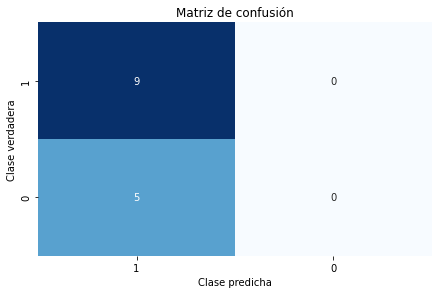

In [14]:
cm = metrics.confusion_matrix(y, y_pred, labels=class_labels)

# se crea un DataFrame en el que el contenido es la matriz de confusión 
# y los índices son las posibles etiquetas de la clase
df_cm = pd.DataFrame(cm, index=class_labels, columns=class_labels)

# se muestra el mapa de calor 
sns.heatmap(df_cm, annot=True, cmap="Blues", fmt='d', cbar=False)
plt.title("Matriz de confusión"), plt.tight_layout()
plt.ylabel("Clase verdadera"), plt.xlabel("Clase predicha")
plt.show()

## Ejercicios

1. Carga el fichero **ILPD.data** (es un archivo de texto). 
2. Cuenta los ejemplos que hay de cada clase
3. Crea tres baselines y calcula accuracy, precision, recall y F1 para los tres
4. Repite los cálculos marcando como clase positiva la '0'
5. Calcula la matriz de confusión de uno de los sistemas

Estos ejercicios no es necesario entregarlos.